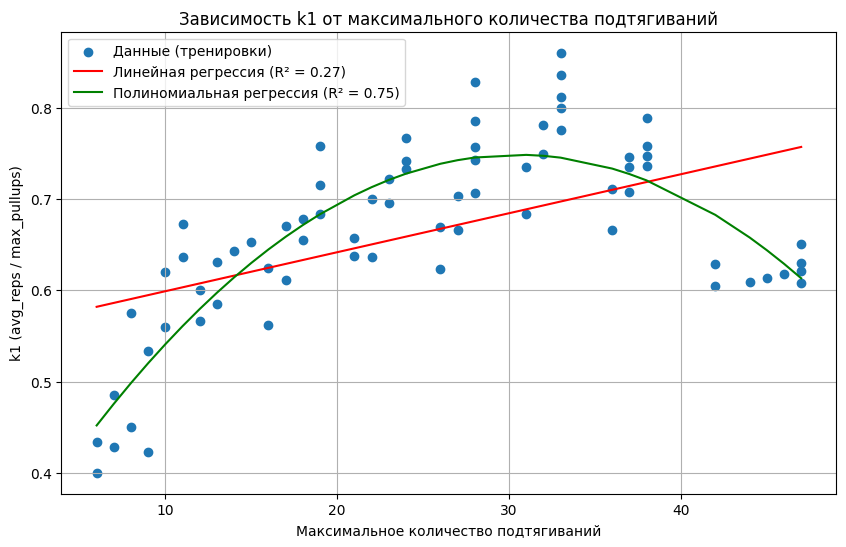

k1 (полиномиальная) для 10 подтягиваний: 0.5409673326315836
k1 (полиномиальная) для 25 подтягиваний: 0.6587563663695113
k1 (полиномиальная) для 40 подтягиваний: 0.7036919630332141
Данные для обучения k1 сохранены в k1_training_data.csv


['k1_poly_features.pkl']

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
import joblib

# Загрузка данных
df = pd.read_csv("training_levels.csv")

# Предобработка данных
df["reps"] = df["reps"].apply(lambda x: [int(r) for r in x.split(",")])
df["avg_reps"] = df["reps"].apply(lambda x: np.mean(x))
df["k1"] = df["avg_reps"] / df["max_pullups"]

#  УДАЛЯЕМ группировку по level, работаем с каждой тренировкой:
#  level_data = df.groupby("level").agg({"max_pullups": "mean", "k1": "mean"}).reset_index()

# Линейная регрессия
X = df["max_pullups"].values.reshape(-1, 1)  #  Используем max_pullups каждой тренировки
y = df["k1"].values                        #  Используем k1 каждой тренировки
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)

# Полиномиальная регрессия (для сравнения)
poly = PolynomialFeatures(degree=2)  # Попробуем степень 2
X_poly = poly.fit_transform(X)
model_poly = LinearRegression()
model_poly.fit(X_poly, y)
y_pred_poly = model_poly.predict(X_poly)
r2_poly = r2_score(y, y_pred_poly)


# Визуализация
plt.figure(figsize=(10, 6))
plt.scatter(df["max_pullups"], df["k1"], label="Данные (тренировки)")  #  Точки для каждой тренировки
plt.plot(X, y_pred, color='red', label=f'Линейная регрессия (R² = {r2:.2f})')
plt.plot(X, y_pred_poly, color='green', label=f'Полиномиальная регрессия (R² = {r2_poly:.2f})')
plt.xlabel("Максимальное количество подтягиваний")
plt.ylabel("k1 (avg_reps / max_pullups)")
plt.title("Зависимость k1 от максимального количества подтягиваний")
plt.legend()
plt.grid(True)
plt.show()

# Функция для расчета k1 (линейная модель)
def calculate_k1_linear(max_pullups):
    return model.predict(np.array([[max_pullups]]))[0]

# Функция для расчета k1 (полиномиальная модель, если нужна)
def calculate_k1_poly(max_pullups):
    return model_poly.predict(poly.transform(np.array([[max_pullups]])))[0]

# Примеры использования
print(f"k1 (полиномиальная) для 10 подтягиваний: {calculate_k1_poly(10)}")
print(f"k1 (полиномиальная) для 25 подтягиваний: {calculate_k1_poly(17)}")
print(f"k1 (полиномиальная) для 40 подтягиваний: {calculate_k1_poly(40)}")


# Сохраняем данные для обучения k1 (max_pullups, k1) в отдельный CSV.
# Это нужно для backend.
k1_training_data = df[["max_pullups", "k1"]]
k1_training_data.to_csv("k1_training_data.csv", index=False)
print("Данные для обучения k1 сохранены в k1_training_data.csv")

joblib.dump(model_poly, 'k1_poly_model.pkl')
joblib.dump(poly, 'k1_poly_features.pkl')

